In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("BlackFriday.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
del df["Product_Category_2"]
del df["Product_Category_3"]

In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## How many unique customers are there?

In [6]:
df["User_ID"].nunique()

5891

## How many unique products are there?

In [7]:
df["Product_ID"].nunique()

3623

 ## What is the total amount spent by people on Black Friday Sale?

In [8]:
df["Purchase"].sum()

5017668378

## What is the gender ratio of sale?

<Axes: >

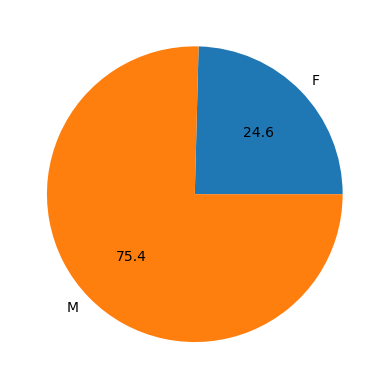

In [9]:
df.groupby("Gender").size().plot(kind = "pie", autopct = "%.1f")

## Compare the amount spent by males and females on sale.

<Axes: ylabel='Purchase'>

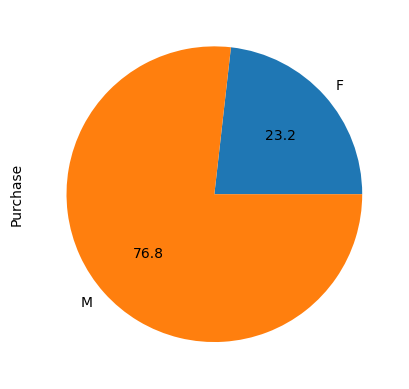

In [10]:
df.groupby("Gender").sum()["Purchase"].plot(kind = "pie", autopct = "%.1f")

## Age wise distribution of number of products bought during sale

<Axes: xlabel='Age'>

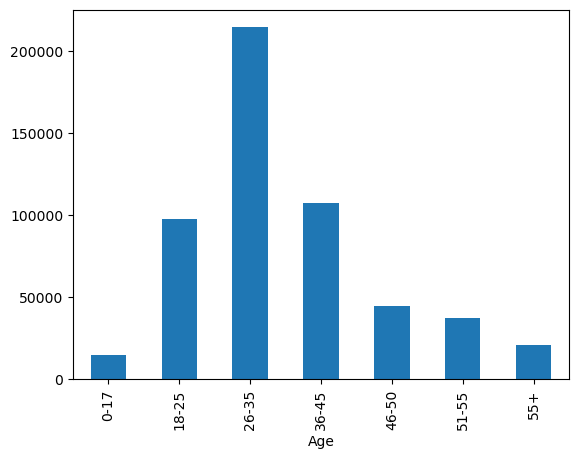

In [11]:
df.groupby("Age").size().plot(kind = 'bar')

## Age wise distribution of number of unique products obought during the sale

<Axes: xlabel='Age'>

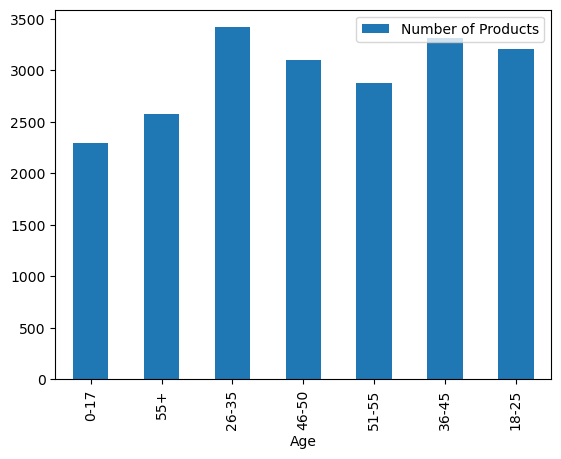

In [12]:
lst = []

for i in df["Age"].unique():
    lst.append([i, df[df["Age"] == i]["Product_ID"].nunique()])

data = pd.DataFrame(lst, columns = ["Age", "Number of Products"])
data.plot.bar(x = "Age")

## Total amount spent by each age category

<Axes: xlabel='Age'>

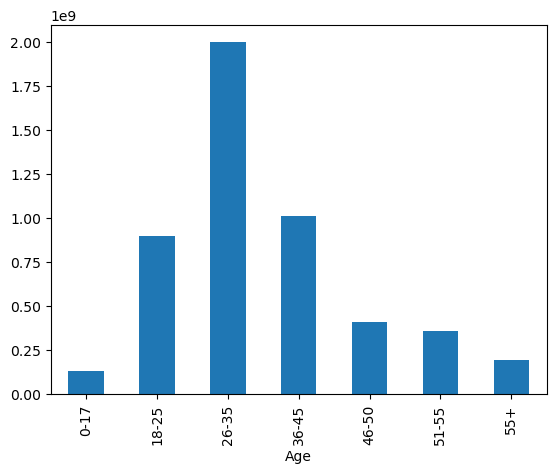

In [13]:
df.groupby("Age").sum()["Purchase"].plot(kind = "bar")

## Multi column Analysis

## Gender split of total products bought in each age category

<Axes: xlabel='Age', ylabel='count'>

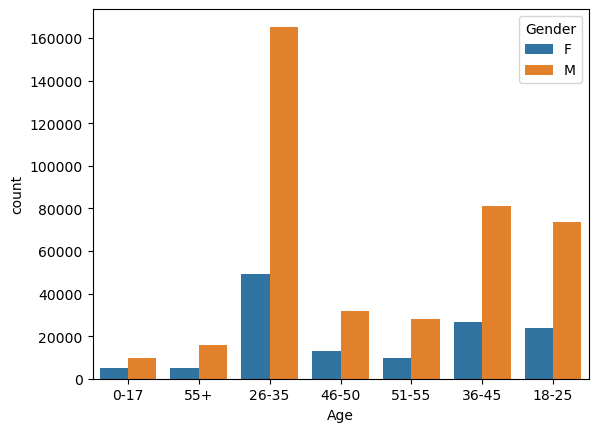

In [14]:
sns.countplot(x = "Age", hue = "Gender", data = df)

## Marital status split  in each gender category

<Axes: xlabel='Gender', ylabel='count'>

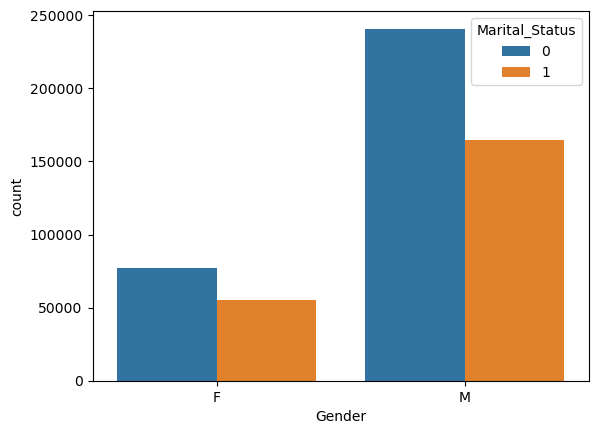

In [15]:
sns.countplot(x = "Gender", hue = "Marital_Status", data = df)

## City wise split of data

<Axes: >

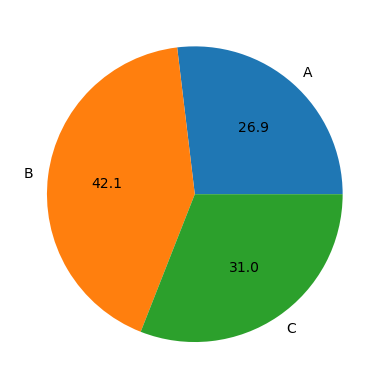

In [16]:
df.groupby("City_Category").size().plot(kind = "pie", autopct = "%.1f")

## Marital status split of total products bought in each city

<Axes: xlabel='City_Category', ylabel='count'>

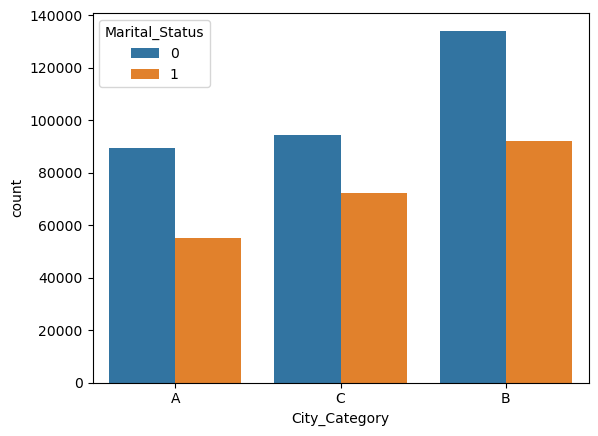

In [17]:
sns.countplot(x = "City_Category", hue = "Marital_Status", data = df)

## Gender split of total products bought in each city

<Axes: xlabel='City_Category', ylabel='count'>

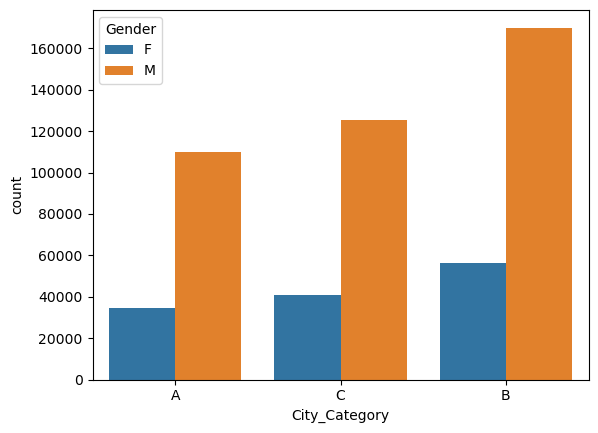

In [18]:
sns.countplot(x = "City_Category", hue = "Gender", data = df)

## Analysis based on number of years lived in the current city

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

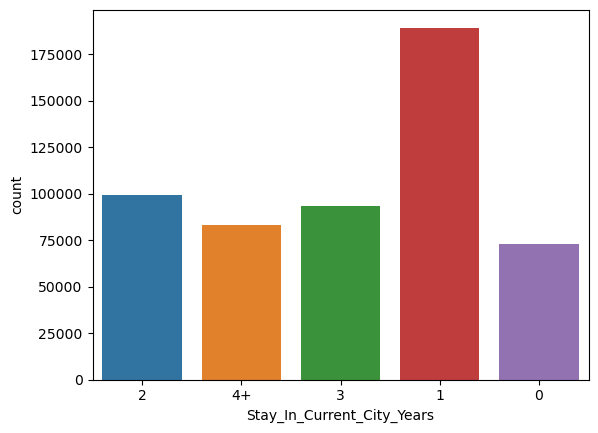

In [19]:
sns.countplot(x = df["Stay_In_Current_City_Years"])

## Number of males and females living in each stay category

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

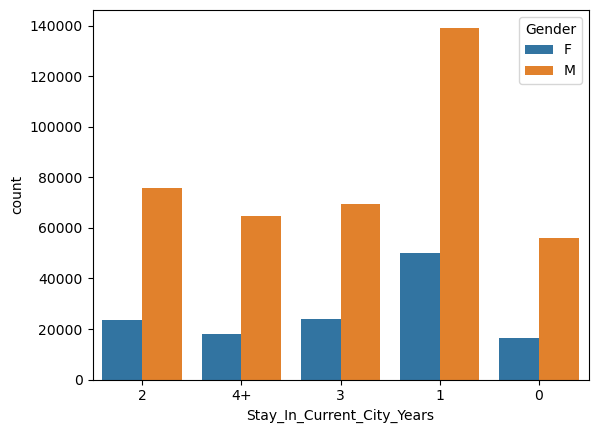

In [20]:
sns.countplot(x = "Stay_In_Current_City_Years", hue = "Gender", data = df)

## Number of married and unmarried living in each stay category

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

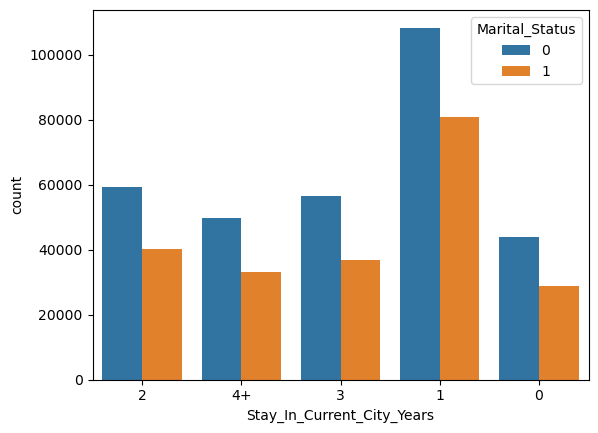

In [21]:
sns.countplot(x = "Stay_In_Current_City_Years", hue = "Marital_Status", data = df)

## City wise split of people living in each stay category

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

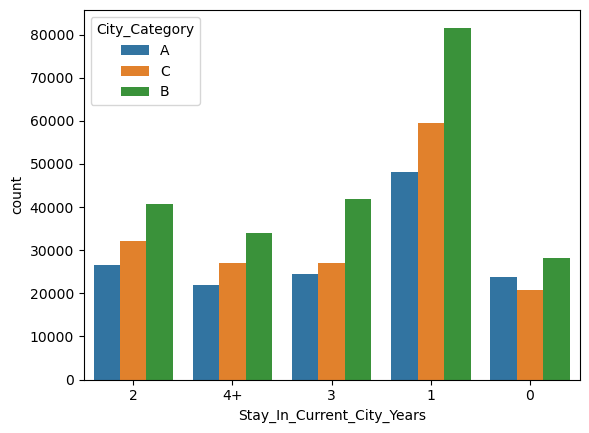

In [22]:
sns.countplot(x = "Stay_In_Current_City_Years", hue = "City_Category", data = df)

## Analysis based on the occupation of people

<Axes: xlabel='Occupation', ylabel='count'>

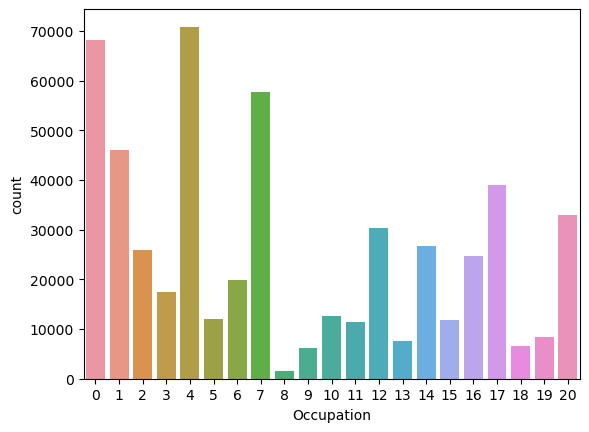

In [23]:
sns.countplot(x = df['Occupation'])

## Total number of products bought by people in each occupation

<Axes: xlabel='Occupation'>

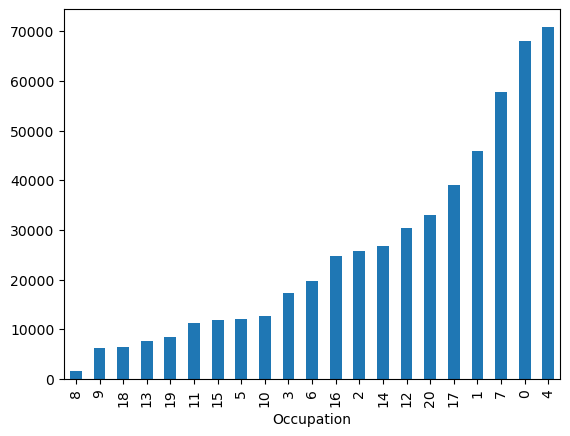

In [24]:
df.groupby("Occupation").size().sort_values().plot(kind = 'bar')

## Total amount spent on products by people in each occupation

<Axes: xlabel='Occupation'>

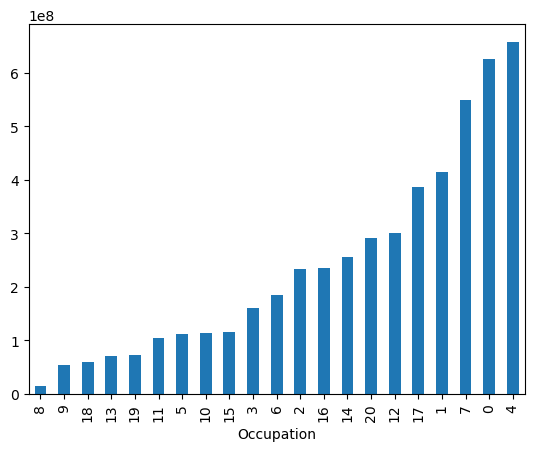

In [25]:
df.groupby("Occupation").sum()['Purchase'].sort_values().plot(kind = 'bar')

## Number of married and unmarried in each occupation category

<Axes: xlabel='Occupation', ylabel='count'>

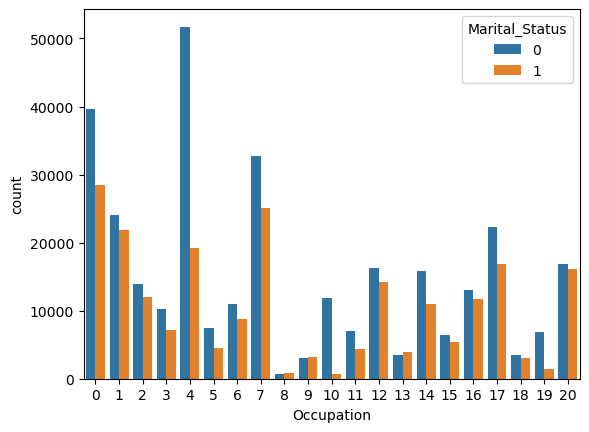

In [27]:
sns.countplot(x = "Occupation", hue = "Marital_Status", data = df)

## Number of males and females in each occupation category

<Axes: xlabel='Occupation', ylabel='count'>

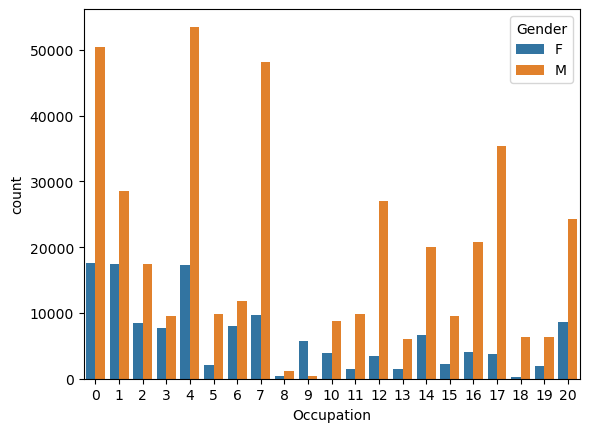

In [28]:
sns.countplot(x = "Occupation", hue = "Gender", data = df)

## Number of unique products bought by each occupation category

<Axes: xlabel='Occupation'>

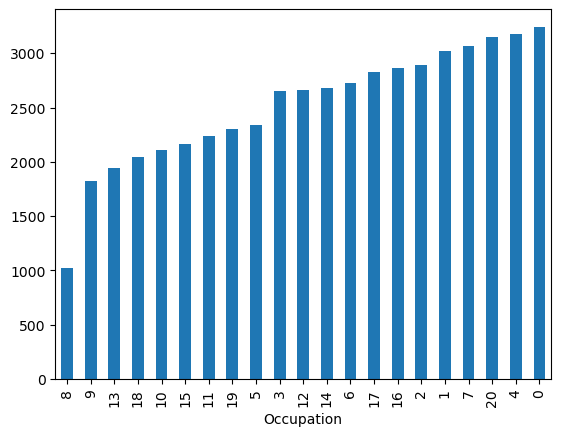

In [31]:
df.groupby("Occupation").nunique()["Product_ID"].sort_values().plot(kind = 'bar')

## Analysis based on Product category

In [32]:
df.groupby("Product_Category_1").size()

Product_Category_1
1     138353
2      23499
3      19849
4      11567
5     148592
6      20164
7       3668
8     112132
9        404
10      5032
11     23960
12      3875
13      5440
14      1500
15      6203
16      9697
17       567
18      3075
dtype: int64

<Axes: xlabel='Product_Category_1'>

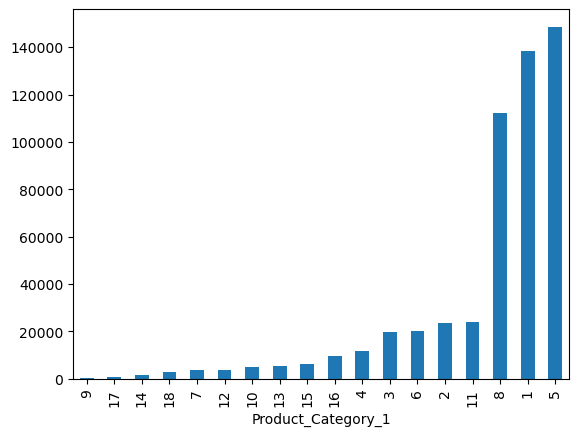

In [33]:
df.groupby("Product_Category_1").size().sort_values().plot(kind = 'bar')

## Total amount spent on each product category

<Axes: xlabel='Product_Category_1'>

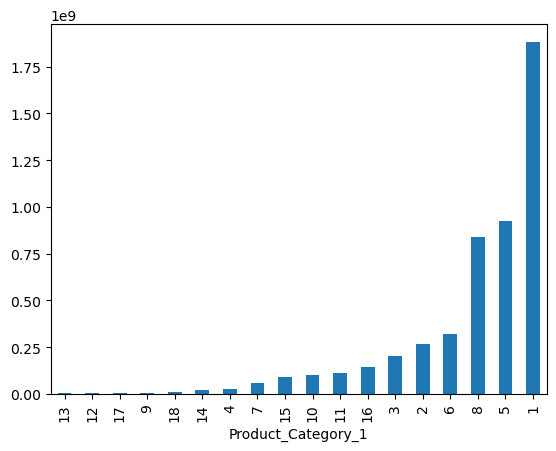

In [35]:
df.groupby("Product_Category_1").sum()["Purchase"].sort_values().plot(kind = 'bar')

## What are the top 10 products on which people are spending most?

<Axes: xlabel='Product_ID'>

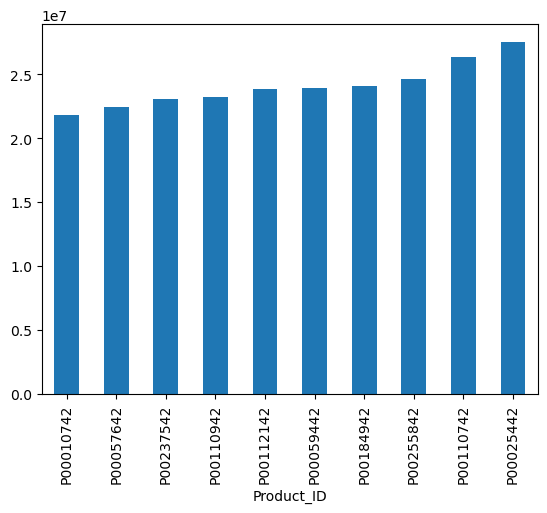

In [36]:
df.groupby("Product_ID").sum()["Purchase"].nlargest(10).sort_values().plot(kind = 'bar')

## Combining gender and marital status for analysis

In [37]:
lst = []

for i in range(len(df)):
    lst.append(df['Gender'][i] + "_" + str(df['Marital_Status'][i]))

df['MaritalGender'] = lst

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<Axes: xlabel='MaritalGender', ylabel='count'>

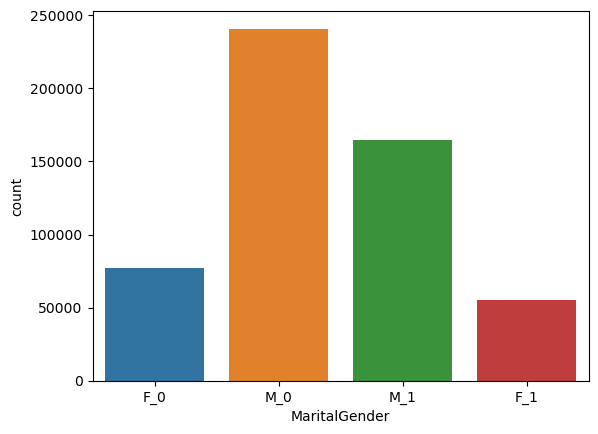

In [38]:
sns.countplot(x = df['MaritalGender'])

<Axes: xlabel='Age', ylabel='count'>

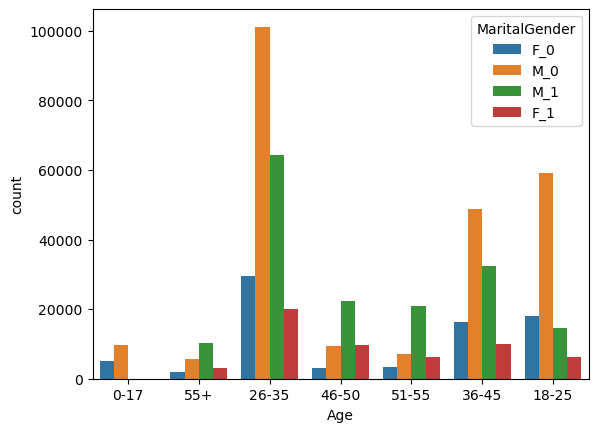

In [40]:
sns.countplot(x = "Age", hue = 'MaritalGender', data = df)